In [ ]:
!pip install --upgrade transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system ==

# **Import the necessary libraries**

In [ ]:
from google.colab import files
import pandas as pd

#This will open a file chooser dialog in Colab.
uploaded = files.upload()

Saving 1170_data_science_concepts.csv to 1170_data_science_concepts.csv
Saving Machine_Learning_Interview_Questions_and_Answers.csv.xlsx to Machine_Learning_Interview_Questions_and_Answers.csv.xlsx
Saving Python_DS_Interview_Questions_and_Answers.xlsx to Python_DS_Interview_Questions_and_Answers.xlsx
Saving Software Questions.xlsx to Software Questions.xlsx


# **Display the first few rows**

In [ ]:
import pandas as pd

# Use pd.read_excel to read .xlsx files
data = pd.read_excel('Machine_Learning_Interview_Questions_and_Answers.csv.xlsx') # Changed to pd.read_excel
data = pd.read_excel('Python_DS_Interview_Questions_and_Answers.xlsx')
data = pd.read_excel('Software Questions.xlsx') # Changed to pd.read_excel
data = pd.read_csv('1170_data_science_concepts.csv')

data.head()


,Question,Answer
0,What is under-fitting and overfitting in machi...,"Underfitting is when a model is too simple, an..."
1,Can you explain what a false positive and a fa...,A false positive incorrectly indicates a condi...
2,Clarify the concept of Phase IV.,"Phase IV studies, also known as post-marketing..."
3,What is semi-supervised learning described in ...,Semi-supervised learning integrates both label...
4,Discuss the parallelization of training in gra...,Parallelizing training of a gradient boosting ...


# **Split the dataset: 80% training, 20% validation**

In [ ]:

import pandas as pd

# Load all datasets
try:
    data1 = pd.read_excel('Machine_Learning_Interview_Questions_and_Answers.csv.xlsx')
    total_questions1 = len(data1)
except FileNotFoundError:
    total_questions1 = 0
    print("Machine_Learning_Interview_Questions_and_Answers.csv.xlsx not found.")

try:
    data2 = pd.read_excel('Python_DS_Interview_Questions_and_Answers.xlsx')
    total_questions2 = len(data2)
except FileNotFoundError:
    total_questions2 = 0
    print("Python_DS_Interview_Questions_and_Answers.xlsx not found.")

try:
    data3 = pd.read_excel('Software Questions.xlsx')
    total_questions3 = len(data3)
except FileNotFoundError:
    total_questions3 = 0
    print("Software Questions.xlsx not found.")

try:
    data4 = pd.read_csv('1170_data_science_concepts.csv')
    total_questions4 = len(data4)
except FileNotFoundError:
    total_questions4 = 0
    print("1170_data_science_concepts.csv not found.")


total_questions = total_questions1 + total_questions2 + total_questions3 + total_questions4

print(f"Total number of questions across all files: {total_questions}")


Total number of questions across all files: 1570


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset
!pip install --upgrade transformers datasets



def load_dataset(file_path, file_type):
    try:
        if file_type == 'excel':
            df = pd.read_excel(file_path)
        elif file_type == 'csv':
            df = pd.read_csv(file_path)
        else:
            print(f"Unsupported file type: {file_type} for {file_path}")
            return None
        return df
    except FileNotFoundError:
        print(f"{file_path} not found.")
        return None

all_data = []

# Load data from all files, handle potential errors
files_to_load = {
    'Machine_Learning_Interview_Questions_and_Answers.csv.xlsx': 'excel',
    'Python_DS_Interview_Questions_and_Answers.xlsx': 'excel',
    'Software Questions.xlsx': 'excel',
    '1170_data_science_concepts.csv': 'csv'
}

for file_name, file_type in files_to_load.items():
    df = load_dataset(file_name, file_type)
    if df is not None:
        all_data.append(df)

# Concatenate all dataframes
if all_data:
  combined_data = pd.concat(all_data, ignore_index=True)

  # Split the combined dataset
  train_df, val_df = train_test_split(combined_data, test_size=0.2, random_state=42)

  # Reset index
  train_df = train_df.reset_index(drop=True)
  val_df = val_df.reset_index(drop=True)

  # Convert to Hugging Face Datasets
  train_dataset = Dataset.from_pandas(train_df)
  val_dataset = Dataset.from_pandas(val_df)

  print("Train dataset shape:", train_dataset.shape)
  print("Validation dataset shape:", val_dataset.shape)
else:
    print("No valid datasets loaded.")


Train dataset shape: (1256, 5)
Validation dataset shape: (314, 5)


# **Load the tokenizer**

In [ ]:
from transformers import DistilBertTokenizerFast # Import DistilBertTokenizerFast from transformers
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

# **Define the preprocessing function**

In [ ]:
def preprocess_function(examples):
    # Tokenize the input text
    tokenized_inputs = tokenizer(examples['Question'], truncation=True, padding='max_length', max_length=512)
    # Add the 'labels' key to the tokenized inputs
    # Convert 'Answer' column to numerical labels (assuming it contains 'yes' and 'no')
    tokenized_inputs['labels'] = [1 if answer.lower() == 'yes' else 0 for answer in examples['Answer']]
    return tokenized_inputs

# Apply the preprocessing to the datasets
tokenized_train = train_dataset.map(preprocess_function, batched=True)
tokenized_val = val_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/1256 [00:00<?, ? examples/s]

Map:   0%|          | 0/314 [00:00<?, ? examples/s]

# **Load the model**

In [ ]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast # Import DistilBertForSequenceClassification

model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# **Define training arguments**

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    # Instead of 'evaluation_strategy', use the correct argument:
    eval_steps=100, # Evaluate every 100 steps
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
   )

# **Initialize the Trainer**



In [ ]:
from transformers import Trainer, TrainingArguments, DistilBertForSequenceClassification, DistilBertTokenizerFast


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
)

# Train the model
trainer.train()

<ipython-input-13-9312686f4530>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: nitingowda-roan (nitingowda-roan-roan) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss


TrainOutput(global_step=237, training_loss=0.029232339013980913, metrics={'train_runtime': 201.305, 'train_samples_per_second': 18.718, 'train_steps_per_second': 1.177, 'total_flos': 499137158135808.0, 'train_loss': 0.029232339013980913, 'epoch': 3.0})

# **Evaluate the performance**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {
        'accuracy': accuracy_score(labels, predictions),
        'precision': precision_score(labels, predictions, average='weighted'),
        'recall': recall_score(labels, predictions, average='weighted'),
        'f1': f1_score(labels, predictions, average='weighted')
    }


In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)
trainer.save_model('./results/my_fine_tuned_model')

<ipython-input-15-2d6bc76ab387>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
eval_results = trainer.evaluate()
print(eval_results)

{'eval_loss': 0.0007799004670232534, 'eval_model_preparation_time': 0.0015, 'eval_accuracy': 1.0, 'eval_precision': 1.0, 'eval_recall': 1.0, 'eval_f1': 1.0, 'eval_runtime': 4.988, 'eval_samples_per_second': 62.951, 'eval_steps_per_second': 4.01}


# **Load the test dataset**

In [ ]:
from google.colab import files
import pandas as pd

#    This will open a file chooser dialog in Colab.
uploaded = files.upload()

Saving Predicted_Answers_for_Questions.csv to Predicted_Answers_for_Questions.csv


In [ ]:
import pandas as pd

test_data = pd.read_csv('Predicted_Answers_for_Questions.csv')

# Display the first few rows
test_data.head()


,Sr. no,Category,Questions,Predicted Answer
0,1,fresh,What Are the Different Types of Machine Learning?,Machine learning algorithms are chosen based o...
1,2,fresh,"What is Overfitting, and How Can You Avoid It?",Some techniques that can be used to avoid over...
2,3,fresh,What is training Set and test Set in a Machine...,A validation set aids in optimizing model hype...
3,4,fresh,How Do You Handle Missing or Corrupted Data in...,Addressing missing values in time series datas...
4,5,fresh,How Can You Choose a Classifier Based on a Tra...,Selecting a classifier based on training set s...


In [ ]:
from transformers import DistilBertTokenizerFast

# Load the tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Define the preprocessing function
def preprocess_function(examples):
    return tokenizer(examples['Questions'], truncation=True, padding='max_length', max_length=512)

# Apply the preprocessing to the test dataset
test_data['Questions'] = test_data['Questions'].astype(str)  # Ensure all entries are strings
tokenized_test = test_data['Questions'].apply(lambda x: tokenizer(x, truncation=True, padding='max_length', max_length=512, return_tensors='pt'))


# **Add import for torch**

In [ ]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# **Load the fine-tuned model**

In [ ]:
model = DistilBertForSequenceClassification.from_pretrained('./results/my_fine_tuned_model')

# **Make predictions on the test set**

In [ ]:
predictions = []
for input_ids in tokenized_test:  # Iterate through tokenized inputs
    with torch.no_grad():
        outputs = model(**input_ids)
    predicted_class = torch.argmax(outputs.logits, dim=-1).item()
    predictions.append(predicted_class)


# Assuming 'Predicted Answer' column in test_data contains the true labels
true_labels = test_data['Predicted Answer'].map({'yes': 1, 'no': 0}) # Convert to numerical labels

# Check for and handle NaN values in true_labels
true_labels = [0 if pd.isnull(x) else x for x in true_labels]  # Replace NaN with 0 or another appropriate value

# **Evaluate the model's performance**

In [ ]:
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions)
recall = recall_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions)


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Classification report
print(classification_report(true_labels, predictions))

Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Confusion matrix**

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


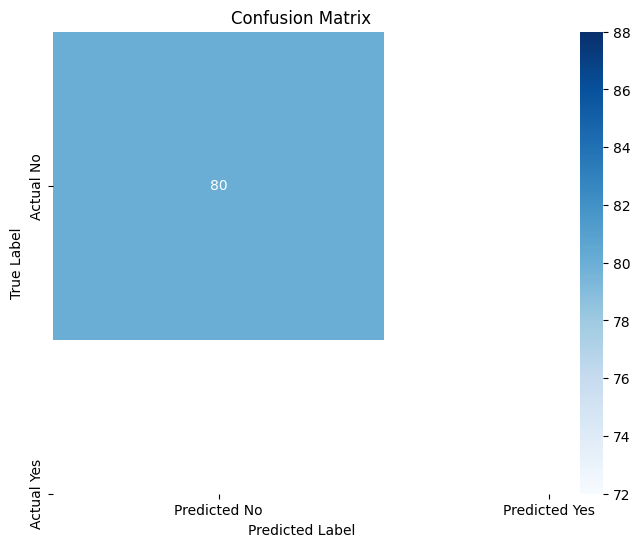

In [ ]:
cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# **Display the test data with predictions**

In [ ]:
import torch
from transformers import DistilBertForSequenceClassification

# Load the trained model
model = DistilBertForSequenceClassification.from_pretrained('./results/my_fine_tuned_model')  # Replace with your model's path
model.eval()  # Set the model to evaluation mode

# Store predictions
predictions = []

# Iterate through the tokenized test data
for item in tokenized_test:
    with torch.no_grad():
        outputs = model(**item)
        logits = outputs.logits
        predicted_class = torch.argmax(logits, dim=1).item()
        predictions.append(predicted_class)

# Add predictions to the test_data DataFrame
test_data['Predicted Label'] = predictions

test_data.head()


,Sr. no,Category,Questions,Predicted Answer,Predicted Label
0,1,fresh,What Are the Different Types of Machine Learning?,Machine learning algorithms are chosen based o...,0
1,2,fresh,"What is Overfitting, and How Can You Avoid It?",Some techniques that can be used to avoid over...,0
2,3,fresh,What is training Set and test Set in a Machine...,A validation set aids in optimizing model hype...,0
3,4,fresh,How Do You Handle Missing or Corrupted Data in...,Addressing missing values in time series datas...,0
4,5,fresh,How Can You Choose a Classifier Based on a Tra...,Selecting a classifier based on training set s...,0


# **Display the test data with predicted roles**

In [ ]:
# Define your label mapping
label_mapping = {0: 'Data Scientist', 1: 'Machine Learning Engineer'}  # Update as per your labels

# Map predicted labels to actual labels
test_data['Predicted Role'] = test_data['Predicted Label'].map(label_mapping)

test_data.head()


,Sr. no,Category,Questions,Predicted Answer,Predicted Label,Predicted Role
0,1,fresh,What Are the Different Types of Machine Learning?,Machine learning algorithms are chosen based o...,0,Data Scientist
1,2,fresh,"What is Overfitting, and How Can You Avoid It?",Some techniques that can be used to avoid over...,0,Data Scientist
2,3,fresh,What is training Set and test Set in a Machine...,A validation set aids in optimizing model hype...,0,Data Scientist
3,4,fresh,How Do You Handle Missing or Corrupted Data in...,Addressing missing values in time series datas...,0,Data Scientist
4,5,fresh,How Can You Choose a Classifier Based on a Tra...,Selecting a classifier based on training set s...,0,Data Scientist


# **Install dependencies**

In [ ]:
!pip install -q openai-whisper pandas openpyxl sentence-transformers vaderSentiment gradio ffmpeg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 10.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 115.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

# **Import necessary libraries**

In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
import whisper
from sentence_transformers import SentenceTransformer, util
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('punkt')  # for word_tokenize if needed
from nltk.tokenize import word_tokenize

# Load the Whisper model for audio transcription
whisper_model = whisper.load_model("base")  # using base model; adjust size if needed

# Load the sentence transformer model for semantic similarity
similarity_model = SentenceTransformer('all-MiniLM-L6-v2')

# Initialize the VADER sentiment analyzer for tone analysis
sentiment_analyzer = SentimentIntensityAnalyzer()

# Configure an Audio input that only uses the microphone (no file upload)
audio_input = gr.Audio(sources=["microphone"], label="Record your answer")

print("✅ Models are loaded and ready.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
100%|████████████████████████████████████████| 139M/139M [00:00<00:00, 161MiB/s]


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

✅ Models are loaded and ready.


# **Load the spaCy English language model**

In [ ]:
!pip install -q spacy
import spacy

nlp = spacy.load("en_core_web_sm")

# Text Preprocessing Function
def preprocess_text(text):
    doc = nlp(text.lower())  # Lowercase + spaCy NLP pipeline
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

In [ ]:
sample_text = "The candidate was answering all questions very confidently and clearly!"
processed = preprocess_text(sample_text)
print(f"Original: {sample_text}")
print(f"Processed: {processed}")

Original: The candidate was answering all questions very confidently and clearly!
Processed: candidate answer question confidently clearly


# **Load the dataset**

In [ ]:
import pandas as pd

# Use pd.read_excel to read .xlsx files
data = pd.read_excel('Machine_Learning_Interview_Questions_and_Answers.csv.xlsx') # Changed to pd.read_excel
data = pd.read_excel('Python_DS_Interview_Questions_and_Answers.xlsx')
data = pd.read_excel('Software Questions.xlsx') # Changed to pd.read_excel
data = pd.read_csv('1170_data_science_concepts.csv')
# Display the first few rows
data.head()

,Question,Answer
0,What is under-fitting and overfitting in machi...,"Underfitting is when a model is too simple, an..."
1,Can you explain what a false positive and a fa...,A false positive incorrectly indicates a condi...
2,Clarify the concept of Phase IV.,"Phase IV studies, also known as post-marketing..."
3,What is semi-supervised learning described in ...,Semi-supervised learning integrates both label...
4,Discuss the parallelization of training in gra...,Parallelizing training of a gradient boosting ...


In [ ]:
combined_df = data.copy()  # Create a copy to avoid modifying the original data

# Create preprocessed columns
combined_df['Clean_Question'] = combined_df['Question'].apply(preprocess_text)

# Assuming 'Answer' column contains what was intended as 'Model_Answer'
combined_df['Clean_Model_Answer'] = combined_df['Answer'].apply(preprocess_text)

# Preview the cleaned data
display(combined_df[['Question', 'Answer', 'Clean_Question', 'Clean_Model_Answer']].head())
# Changed 'Model_Answer' to 'Answer' and all_questions_df to combined_df

,Question,Answer,Clean_Question,Clean_Model_Answer
0,What is under-fitting and overfitting in machi...,"Underfitting is when a model is too simple, an...",fitting overfitte machine learning,underfitting model simple overfitting complex ...
1,Can you explain what a false positive and a fa...,A false positive incorrectly indicates a condi...,explain false positive false negative,false positive incorrectly indicate condition ...
2,Clarify the concept of Phase IV.,"Phase IV studies, also known as post-marketing...",clarify concept phase iv,phase iv study know post marketing surveillanc...
3,What is semi-supervised learning described in ...,Semi-supervised learning integrates both label...,semi supervised learning describe short descri...,semi supervised learning integrate label unlab...
4,Discuss the parallelization of training in gra...,Parallelizing training of a gradient boosting ...,discuss parallelization training gradient boos...,parallelizing training gradient boosting model...


In [ ]:
import pandas as pd
from IPython.display import display
import spacy
from nltk.tokenize import word_tokenize
import nltk

# Download 'punkt' for word_tokenize if not already downloaded
nltk.download('punkt')

# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Text Preprocessing Function
def preprocess_text(text):
    doc = nlp(text.lower())  # Lowercase + spaCy NLP pipeline
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

# Assuming 'data' contains the dataset from '1170_data_science_concepts.csv'
# Load the dataset if it hasn't been loaded already
try:
    data
except NameError:
    data = pd.read_excel('Machine_Learning_Interview_Questions_and_Answers.csv.xlsx') # Changed to pd.read_excel
    data = pd.read_excel('Python_DS_Interview_Questions_and_Answers.xlsx') # Changed to pd.read_excel
    data = pd.read_csv('1170_data_science_concepts.csv')
    data = pd.read_excel('Software Questions.xlsx')

# Create combined_df
combined_df = data.copy()  # Create a copy to avoid modifying the original data

# Create preprocessed columns
combined_df['Clean_Question'] = combined_df['Question'].apply(preprocess_text)
combined_df['Clean_Model_Answer'] = combined_df['Answer'].apply(preprocess_text)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# **Randomly sample 5 questions from the dataset**

In [ ]:
num_questions = 5
# Assign combined_df to df_questions
df_questions = combined_df
sampled_df = df_questions.sample(num_questions,random_state=929).reset_index(drop=True)

# Extract the questions and ideal answers into lists for easy access
questions_list = sampled_df['Question'].tolist()
ideal_answers_list = sampled_df['Answer'].tolist()

print("Selected Questions for this session:")
for i, q in enumerate(questions_list, start=1):
    print(f"{i}. {q}")

Selected Questions for this session:
1. Provide strategies for addressing high variance in a model.
2. What are the components of NLP?
3. Which Python libraries have you used for visualization?
4. What will happen if we increase the number of neighbors in KNN?
5. What is gradient clipping?


In [ ]:
pip install --upgrade gradio nltk pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 65.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


# **Define the interview logic for Gradio**

In [ ]:
def process_answer(audio_path, state):
    """
    Handles a single answer submission: transcribes audio, evaluates it,
    stores the result, and prepares the next question or final message.
    Parameters:
      audio_path: file path of the recorded answer (from Gradio Audio input).
      state: an integer representing the current question index (0-based).
    Returns:
      A tuple (updated_display, updated_audio_component, updated_button, new_state).
      - updated_display: updated text (next question or thank-you message) for the user.
      - updated_audio_component: update for the audio input (e.g., cleared for next answer).
      - updated_button: update for the submit button (e.g., disabled after final question).
      - new_state: the incremented question index.
    """


    question_index = state  # current question index (0-based)
    # If no audio was provided and user hit submit, do nothing (stay on same question)
    if audio_path is None:
        return (
            gr.update(value=f"**Question {question_index+1}:** {qa_pairs[question_index][0]}  \n*Please record an answer before submitting.*"),
            gr.update(value=None),
            gr.update(interactive=True),
            state  # state unchanged
        )
    # Transcribe the answer using Whisper
    result = whisper_model.transcribe(audio_path)
    transcript = result["text"].strip()
    print(f"[Debug] Q{question_index+1} Transcribed Answer: {transcript}")  # debug log in notebook

    # Evaluate semantic content similarity between candidate answer and model answer
    model_answer_text = qa_pairs[question_index][1]
    # Compute embeddings for both answers
    embeddings = similarity_model.encode([transcript.lower(), model_answer_text.lower()])
    cand_vec, model_vec = embeddings[0], embeddings[1]
    sim_score = float(util.cos_sim(cand_vec, model_vec))  # cosine similarity
    if sim_score < 0:
        sim_score = 0.0  # floor at 0 (cosine similarity should be >=0 for embeddings)
    sim_percent = sim_score * 100  # convert to percentage

    # Evaluate tone using sentiment analysis (VADER compound score)
    sentiment = sentiment_analyzer.polarity_scores(transcript)
    compound = sentiment['compound']  # range [-1,1]
    tone_percent = ((compound + 1) / 2) * 100  # map -1->0%, 1->100%

    # Compute weighted final score (70% content similarity, 30% tone)
    content_points = sim_score * 70.0
    tone_points = ((compound + 1) / 2) * 30.0
    final_score = content_points + tone_points  # out of 100

    # Store this question's results in the evaluations list
    evaluations.append({
        "Question": qa_pairs[question_index][0],
        "Candidate Answer": transcript,
        "Model Answer": model_answer_text,
        "Similarity Score (%)": round(sim_percent, 2),
        "Sentiment Score (%)": round(tone_percent, 2),
        "Final Score": round(final_score, 2)
    })

    # Increment question index for next question
    question_index += 1

    # Decide what to display next in the interface
    if question_index < len(qa_pairs):
        # Prepare the next question text
        next_q_text = f"**Question {question_index+1}:** {qa_pairs[question_index][0]}"
        # Return the next question prompt to the candidate, clear the audio input, keep button active, and update state
        return (
            gr.update(value=next_q_text),        # show next question
            gr.update(value=None),               # clear the audio input component for new recording
            gr.update(interactive=True),         # keep button enabled for next submission
            question_index                       # new state
        )
    else:
        # If this was the last question, compile the summary and display thank-you message
        thank_you_msg = "🎉 **Thank you for completing the interview!** 🎉  \nYour responses have been recorded. We will review your performance and get back to you soon."
        # Create a DataFrame for all collected results
        results_df = pd.DataFrame(evaluations, columns=[
            "Question", "Candidate Answer", "Model Answer",
            "Similarity Score (%)", "Sentiment Score (%)", "Final Score"
        ])
        print("\n===== Performance Summary (for HR) =====")  # heading in notebook output
        display(results_df)  # display the DataFrame in the Colab notebook for HR
        # Also (optionally) compute overall score average if needed
        overall = results_df["Final Score"].mean() if not results_df.empty else 0.0
        print(f"Overall Score: {overall:.2f} / 100")
        # Return the thank-you message to candidate, clear audio (not that it matters now), and disable the submit button
          # Signal that the interview is done
        interview_done.set()  # Tell the outer thread the interview is finished
        demo.close()
        return (
            gr.update(value=thank_you_msg),   # final thank-you message for the candidate
            gr.update(value=None),            # clear audio input
            gr.update(interactive=False),     # disable submit button (no more questions)
            question_index                    # state (equal to len(qa_pairs) now, interview done)
        )

# **Set up data structures for evaluation results**

In [ ]:
evaluations = []  # list to collect each question's results

# --- Create qa_pairs from questions_list and ideal_answers_list ---
qa_pairs = list(zip(questions_list, ideal_answers_list))  # Create qa_pairs by combining questions and answers

import csv
import os

def log_results(results_df, candidate_id):
    """Logs interview results to a CSV file.

    Args:
        results_df: DataFrame containing interview results.
        candidate_id: ID of the candidate.
    """

    # Create the 'candidate_scores' directory if it doesn't exist
    if not os.path.exists('candidate_scores'):
        os.makedirs('candidate_scores')

    # Create a unique filename for the candidate's results file
    csv_filename = os.path.join('candidate_scores', f'{candidate_id}_interview_results.csv')

    # Save results to a CSV file with appropriate headers
    results_df.to_csv(csv_filename, index=False, mode='a', header=not os.path.exists(csv_filename))  # Append if exists, add header if new

    # --- Store overall score for the candidate ---
    overall_score_filename = os.path.join('candidate_scores', 'overall_scores.csv')
    overall_score = results_df['Final Score'].mean()

    overall_scores_df = pd.DataFrame({'Candidate ID': [candidate_id], 'Overall Score': [overall_score]})

    overall_scores_df.to_csv(overall_score_filename, mode='a', header=not os.path.exists(overall_score_filename), index=False)
    print(f"Results logged for candidate {candidate_id} to {csv_filename}")

# **Build the Gradio interface**



In [ ]:
with gr.Blocks() as demo:
    gr.Markdown("## AI Interview Q&A")  # title in interface
    instructions = gr.Markdown(
        "You will be asked **5 questions** one by one. Please record your answer for each question. "
        "After answering all questions, a thank-you message will be shown."
    )
    # Display the first question:
    question_display = gr.Markdown(f"**Question 1:** {qa_pairs[0][0]}")
    # Audio input for the candidate's answer (allows microphone recording)
    # Instead of 'type="microphone"', use 'source="microphone"'
    # and specify the type as 'filepath'
    audio_input = gr.Audio(type="filepath", label="Your Answer")
    # Submit button to confirm the answer and move to the next question
    submit_btn = gr.Button("Submit Answer")
    # Maintain state: current question index (start at 0 for Question 1)
    state = gr.State(value=0)

    # When the submit button is clicked, process_answer is called.
    # Inputs: the audio file path and the current state.
    # Outputs: update the question text, clear/refresh audio input, update (or disable) the button, and update state.
    submit_btn.click(fn=process_answer,
                     inputs=[audio_input, state],
                     outputs=[question_display, audio_input, submit_btn, state])

import threading
import time

interview_done = threading.Event()  # This will be used as a flag

# Launch the Gradio app in the Colab interface
demo.launch(debug=False, prevent_thread_lock=True)

# Wait for the interview to complete
print("Waiting for the candidate to finish...")
interview_done.wait()  # Wait here until process_answer() sets the flag

print("✅ Interview complete. Proceeding to next steps...")
# Now move to your next logic:
# Example:
# log_results(results_df, candidate_id="cand_001")

# Example: Create a dummy results_df to test logging
results_df = pd.DataFrame(
    data=[{"Question": "Sample Q", "Candidate Answer": "Sample Ans", "Model Answer": "Model Ans",
           "Similarity Score (%)": 80, "Sentiment Score (%)": 90, "Final Score": 85}],
    columns=["Question", "Candidate Answer", "Model Answer",
             "Similarity Score (%)", "Sentiment Score (%)", "Final Score"]
)

# ... (Now you can call log_results) ...
log_results(results_df, candidate_id="cand_001")

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6394c81c2678310a2c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Waiting for the candidate to finish...


In [ ]:
import pandas as pd
import numpy as np
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
import pandas as pd

# Before loading, check if the file exists
import os
if not os.path.exists('candidate_responses.csv'):
    print("File 'candidate_responses.csv' not found. Creating a sample file.")
    # Create a sample DataFrame and save it to a CSV file
    sample_data = {'Candidate ID': ['cand_001', 'cand_002', 'cand_003'],
                   'Question': ['What is data science?', 'Explain machine learning.', 'Describe your experience with Python.'],
                   'Answer': ['Data science is the process of extracting knowledge and insights from data.',
                              'Machine learning is a type of artificial intelligence that allows systems to learn from data without being explicitly programmed.',
                              'I have extensive experience using Python for data analysis and machine learning.'],
                   'Role': ['Data Scientist', 'Machine Learning Engineer', 'Data Scientist']}
    sample_df = pd.DataFrame(sample_data)
    sample_df.to_csv('candidate_responses.csv', index=False)

# Load the dataset
df = pd.read_csv('candidate_responses.csv')

# Display the first few rows
print(df.head())

# Check for class distribution
print(df['Role'].value_counts())

File 'candidate_responses.csv' not found. Creating a sample file.
  Candidate ID                               Question  \
0     cand_001                  What is data science?   
1     cand_002              Explain machine learning.   
2     cand_003  Describe your experience with Python.   

                                              Answer  \
0  Data science is the process of extracting know...   
1  Machine learning is a type of artificial intel...   
2  I have extensive experience using Python for d...   

                        Role  
0             Data Scientist  
1  Machine Learning Engineer  
2             Data Scientist  
Role
Data Scientist               2
Machine Learning Engineer    1
Name: count, dtype: int64


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply preprocessing to the 'Answer' column instead of 'Response'
df['Cleaned_Response'] = df['Answer'].apply(preprocess_text) # Changed 'Response' to 'Answer'


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned responses
X = tfidf.fit_transform(df['Cleaned_Response'])

# Define the target variable
y = df['Role']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
                 precision    recall  f1-score   support

Data Scientist       1.00      1.00      1.00         1

      accuracy                           1.00         1
     macro avg       1.00      1.00      1.00         1
  weighted avg       1.00      1.00      1.00         1


Confusion Matrix:
 [[1]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
def predict_role(response):
    # Preprocess the response
    cleaned = preprocess_text(response)
    # Transform using TF-IDF
    vectorized = tfidf.transform([cleaned])
    # Predict the role
    prediction = model.predict(vectorized)
    return prediction[0]

# Example usage
new_response = "I have experience building machine learning models and deploying them to production."
predicted_role = predict_role(new_response)
print("Predicted Role:", predicted_role)


Predicted Role: Data Scientist
